In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pylab as pyl
import cv2 as cv
import os
import glob
os.environ['GLOG_minloglevel'] = '3'
import config as cfg
import time

In [2]:
sys.path.append('/home/afromero/caffe-master/python')
from preparing_blobs import get_blobs
import caffe

#Comment if no GPU
caffe.set_device(3)
caffe.set_mode_gpu()

In [3]:
category = cfg.category
category = sorted(category, key=category.get)
    
def plot_images_prediction(img_, pred, confidence, file_save=""):
  img = img_.astype(np.uint8, copy=True)[:,:,(2,1,0)]
  predicted = 'Predicted Emotion: '+ category[pred]+ '\nConfidence: '+str(np.max(confidence))[:4]+'%'
  plt.title(predicted)
  plt.imshow(img)
  plt.axis('off')
  if file_save!="": pyl.savefig(file_save, dpi=100)	
  plt.show()
    
def test(net, img_file, file_save=""):
  t = time.time()
  img = cv.imread(img_file)
  img_blob, label_blob = get_blobs(img, 0)

  net.blobs['data'].data[...] = img_blob
  net.forward()
  elapsed = time.time() - t
  #print "elapsed time "+str(elapsed)
  confidence = net.blobs['softmax'].data[0]
  confidence = [float("%.2f"%(n*100)) for n in confidence]
  max_label = np.where(np.array(confidence) == np.max(confidence))[0][0]
  plot_images_prediction(img, max_label, confidence, file_save)

In [4]:
modeldef    = './model/VGG_Emotions_16_layers_deploy.prototxt'
modelweight = './model/VGG_Emotions.caffemodel'

net = caffe.Net(modeldef, modelweight, caffe.TEST)#VGG model for 16 layers

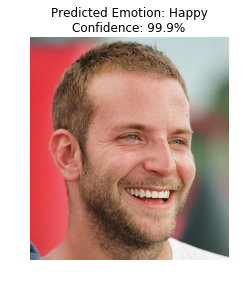

In [5]:
#look for all jpg images
for img_file in glob.glob('imgs/*.jpg'):
  test(net, img_file)   

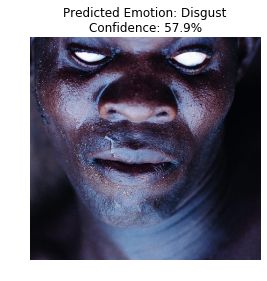

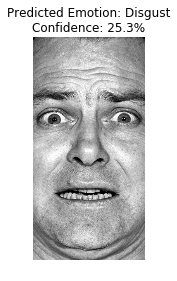

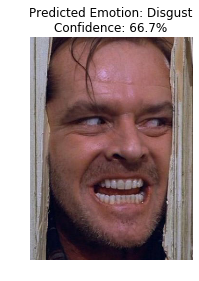

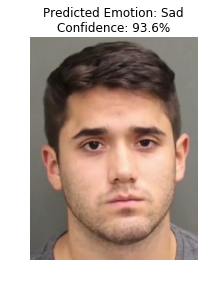

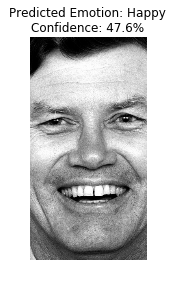

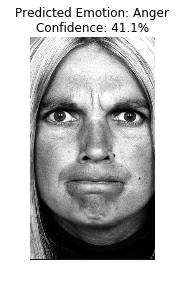

In [6]:
#Look for all png images
for img_file in glob.glob('imgs/*.png'):
  test(net, img_file) 